#Final Jupytor Notebook:

#Phase1:

1-The goal of the dataset

The goal of the dataset is to develop a personalized fitness recommendation system to classify individuals into suitable fitness types for tailored workout plans and improved training efficiency.

2-The source of the dataset

https://data.mendeley.com/datasets/zw8mtbm5b9/1

3-General Information

Structure of the Dataset -Number of Observations: The dataset contains 3,695 records, meaning it includes data for 3,695 different individuals.

-Number of Variables: There are 8 relevant variables , but we used weight , height , and age for predicting the fitness type.
Variables and Their Types

-Sex: Represents the gender of the individual. Possible values: Male, Female

-Age(Integer):Represents the age of the individual.

-Height(Float):Represents the height of the individual in meters.

-Weight(Float):Represents the weight of the individual in kilograms.

-BMI(Float):Calculated as Weight (kg) / Height² (m²). It indicates whether an individual is underweight, normal weight, overweight, or obese.

-Level(Categorical):Represents the BMI classification of the individual. Possible values: Underweight ,Normal ,Overweight, Obese.

-Fitness Goal(Categorical):Describes the individual's primary fitness objective. Possible values: Weight Gain ,Weight Loss

-Fitness Type(Label):This is the output variable that the model aims to predict. Represents the recommended fitness category based on an individual's characteristics and goals.

Possible values: Muscular Fitness ,Cardio Fitness.

In [ ]:
#4- Summary of the dataset
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('Dataset/gym_recommendation.csv')


# 1 Displaying the First Few Rows
print("Displaying the first few rows of the dataset allows us to understand its structure and confirm it has been loaded correctly. This initial check helps identify any unexpected issues, such as incorrect data types or formatting problems, before we proceed with deeper analysis.")
print(df.head())


import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style
sns.set_style("whitegrid")

# Define colors
num_color = "steelblue"
cat_color = "coral"

import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style
sns.set_style("whitegrid")

# Define colors
num_color = "steelblue"
cat_color = "coral"

# 2 Visualizing Numerical Variable Distributions
print("Visualizing the distributions of numerical variables like Age, Height, Weight, and BMI is crucial. These factors significantly influence fitness classifications and personalized recommendations. By using histograms, we can detect imbalances in the data, such as a predominance of certain age groups or BMI ranges, and identify outliers that could impact model performance.")
numerical_vars = ['Age', 'Height', 'Weight', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of Numerical Variables", fontsize=14, fontweight="bold")

for i, var in enumerate(numerical_vars):
    row, col = divmod(i, 2)
    sns.histplot(df[var], bins=15, color=num_color, kde=True, ax=axes[row, col])
    axes[row, col].set_title(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3 Visualizing Categorical Variable Distributions
print("Next, we visualize categorical variables like Sex, Fitness Goal, and Fitness Type. Understanding how these categories are distributed is essential for building a personalized recommendation system. Insights into Fitness Goals and Types help ensure the recommendations align with user preferences and needs.")
categorical_vars = ['Sex', 'Fitness Goal', 'Fitness Type']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Distribution of Categorical Variables", fontsize=14, fontweight="bold")

for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, hue=var, legend=False, ax=axes[i])
    axes[i].set_title(var)
    axes[i].set_xticks(range(len(df[var].unique())))
    axes[i].set_xticklabels(df[var].unique(), rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


missing_values = df.isnull().sum()

# Handling Missing Values
print("Checking for missing values is vital as they can lead to incorrect recommendations. Confirming that our dataset has no missing values indicates high data quality, allowing us to proceed without the need for imputation techniques.")
print("Missing Values Summary:\n")
print(missing_values.to_frame(name="Missing values in each column"))  # Display as a table-like format

if missing_values.sum() == 0:
    print("\n No missing values found in the dataset!")

print("To further clarify, here is a heatmap of missing values, showing a solid color as there are no missed values")
# Heatmap of missing values
plt.figure(figsize=(8, 4))  # Adjust size for better readability
sns.heatmap(df.isnull(), cbar=False, cmap="Purples", yticklabels=False, linewidths=0.5, linecolor="#5A86AD")
plt.title("Missing Values Heatmap", fontsize=12, fontweight="bold")
plt.show()


numerical_cols = ['Age', 'Height', 'Weight', 'BMI']  

# Statistical Summary 
print("\n\nStatistical Summary:")  
print("The following table provides descriptive statistics (count, mean, std, min, max, percentiles) for Age, Height, Weight, and BMI.\nUnderstanding the distribution and range of these user characteristics is crucial for personalized fitness recommendations.\n")
print(df[numerical_cols].describe())

# Variance 
print("\nVariance of numerical variables:")  
print("Variance measures the spread of data around the mean.\n ")
print(df[numerical_cols].var())

# BMI vs Fitness Goal (Does a higher BMI correlate with more "Weight Loss" goals?)
# Justification for BMI vs. Fitness Goal Plot:
print("\n\nBMI vs. Fitness Goal:")
print("This bar plot visualizes the average BMI for each fitness goal category. It helps explore the relationship\nbetween BMI and the fitness goal. We can assess if individuals with higher BMIs are more likely to have\n'Weight Loss' as their fitness goal.")
sns.barplot(data=df, x="Fitness Goal", y="BMI")  
plt.title("Average BMI for Each Fitness Goal")
plt.show()

# Weight & Height VS BMI (Do weight and height strongly influence BMI?)
# Justification for Weight & Height vs. BMI Plot:
print("\nWeight & Height vs. BMI:")
print("This scatter plot visualizes the relationship between weight and height, with BMI represented by color.\nIt helps understand how these two fundamental measurements influence BMI. We expect to see a strong correlation,\nas BMI is calculated directly from weight and height.")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='BMI', palette='viridis')
plt.title('Weight vs. Height (Colored by BMI)')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()






In [1]:
#5-Preprocessing techniques

import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Define file paths
dataset_dir = "Dataset"
file1 = os.path.join(dataset_dir, "gym recommendation1.csv")
file2 = os.path.join(dataset_dir, "gym recommendation_Cleaned.csv")

# Check if files exist
if not os.path.exists(file1):
    raise FileNotFoundError(f"File not found: {file1}")
if not os.path.exists(file2):
    raise FileNotFoundError(f"File not found: {file2}")

# Load the datasets
df_processed = pd.read_csv(file1)  # Original dataset before removing columns & duplicates
df_original_deduped = pd.read_csv(file2)  # Dataset after removing duplicates, before normalization

# 1. Variable Removal: Drop unnecessary columns
#Remove columns like Exercises, Equipment, Diet, Recommendation: For building a recommendation system focusing on Fitness Type, other details might distract the model or are not needed for the primary goal.
columns_to_drop = ["ID", "Exercises", "Equipment", "Diet", "Recommendation"]
df_full = df_processed.drop(columns=columns_to_drop, errors="ignore")

# 2. Duplicate Removal: Ensure duplicates are removed
# Remove Duplicate Rows: Duplicate entries can lead to biases in the model, as they may overrepresent certain patterns. Removing duplicates helps ensure the model is trained on diverse and unique data instances, improving generalization.
# Identify and remove duplicate rows in the original dataset
df_processed_deduped = df_full.drop_duplicates()

# 3. Variable Transformation and Encoding
#Categorical Encoding: Columns like Sex, Level, Fitness Goal should be encoded into numerical formats suitable for machine learning algorithms. This can be achieved using label encoding or one-hot encoding, depending on the model requirements.
#Label Encoding for Fitness Type: This is the target variable, so it should be label encoded for classification purposes.
categorical_cols = ["Sex", "Level", "Fitness Goal", "Hypertension", "Diabetes", "Fitness Type"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_processed_deduped[col] = le.fit_transform(df_processed_deduped[col])
    label_encoders[col] = le  # Store encoder for later use

# 4. Normalization/Scaling for numerical features
#Scale Numerical Features (Age, Height, Weight, BMI): These features should be scaled to ensure they contribute equally to the model's performance. Use Min-Max scaling to normalize these features between 0 and 1.
scaler = MinMaxScaler()
numerical_columns = ["Age", "Height", "Weight", "BMI"]

df_processed_deduped[numerical_columns] = scaler.fit_transform(df_processed_deduped[numerical_columns])

# Save the processed datasets
df_original_deduped.to_csv("gym_recommendation_original_deduped.csv", index=False)
df_processed_deduped.to_csv("gym_recommendation_processed_deduped.csv", index=False)

print("✅ Preprocessing completed successfully. Files saved.")

FileNotFoundError: File not found: Dataset\gym recommendation1.csv

---------------------------------------------------------------------------------------------------------------------------------------------

#Phase2:

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 1 Load Preprocessed Data
file_path = "gym_recommendation_processed_deduped.csv"
df = pd.read_csv(file_path)

# 2 Separate Features & Target Variable
target_column = "Fitness Type"

# Features: Age, Height, Weight
input_features = ["Age", "Height", "Weight"]
X = df[input_features]
y = df[target_column]

# 3 Split Data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4 Train Decision Tree Classifier (ID3 Algorithm)
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)

# 5 Train Support Vector Machine (SVM - Linear Kernel)
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# 6 Cross-Validation Evaluation
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)

print("\nDecision Tree Cross-Validation Scores:", dt_cv_scores)
print("SVM Cross-Validation Scores:", svm_cv_scores)

print(f"Decision Tree Average Cross-Validation Accuracy: {dt_cv_scores.mean():.2f}")
print(f"SVM Average Cross-Validation Accuracy: {svm_cv_scores.mean():.2f}")

# 7 Generate Cross-Validated Predictions for Classification Reports
y_pred_dt_cv = cross_val_predict(dt_model, X, y, cv=5)
y_pred_svm_cv = cross_val_predict(svm_model, X, y, cv=5)

# 8 Classification Reports for Cross-Validated Predictions
print("\nDecision Tree Cross-Validation Classification Report:\n", classification_report(y, y_pred_dt_cv))
print("\nSVM Cross-Validation Classification Report:\n", classification_report(y, y_pred_svm_cv))

# 9 Save the Best Model for Future Predictions
best_model = dt_model if dt_cv_scores.mean() > svm_cv_scores.mean() else svm_model
joblib.dump(best_model, "best_fitness_model.pkl")

# Print the best model that was saved
if best_model == dt_model:
    print("✅ Decision Tree model saved for future predictions.")
else:
    print("✅ SVM model saved for future predictions.")

# 10 Function to Predict Fitness Type from User Input
def predict_fitness(user_input):
    model = joblib.load("best_fitness_model.pkl")
    input_df = pd.DataFrame([user_input], columns=input_features)
    prediction = model.predict(input_df)[0]
    return prediction

# 11 Get User Input
try:
    age = float(input("Enter Age: "))
    height = float(input("Enter Height: "))
    weight = float(input("Enter Weight: "))

    user_input = {
        "Age": age,
        "Height": height,
        "Weight": weight
    }

    # 12 Predict Fitness Type
    predicted_fitness_num = predict_fitness(user_input)
    # Map Numerical Prediction to Labels
    if predicted_fitness_num == 0:
        predicted_fitness_label = "Cardio"
    else:
        predicted_fitness_label = "Muscular"

    print("Predicted Fitness Type:", predicted_fitness_label)

except ValueError:
    print("Invalid input. Please enter numerical values for Age, Height, and Weight.")


Decision Tree Cross-Validation Scores: [0.98671648 0.99335548 0.98006645 0.99335548 0.95930233]
SVM Cross-Validation Scores: [0.99667912 0.99335548 0.99335548 0.98837209 0.97342193]
Decision Tree Average Cross-Validation Accuracy: 0.98
SVM Average Cross-Validation Accuracy: 0.99

Decision Tree Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6201
           1       0.98      0.98      0.98      5840

    accuracy                           0.98     12041
   macro avg       0.98      0.98      0.98     12041
weighted avg       0.98      0.98      0.98     12041


SVM Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6201
           1       1.00      0.98      0.99      5840

    accuracy                           0.99     12041
   macro avg       0.99      0.99      0.99     12041
weighted avg      

#discussing the result:

The performance comparison between the Decision Tree (ID3 algorithm) and Support Vector Machine (SVM - Linear Kernel) was conducted using cross-validation accuracy and classification reports. The Decision Tree model achieved an average cross-validation accuracy of 0.98, with some variation across different folds, while the SVM model had a slightly higher accuracy of 0.99, demonstrating better consistency and generalization.

From the classification reports, both models performed well, but SVM showed slightly better results. The Decision Tree had an F1-score of 0.98 for both classes, while the SVM achieved 0.99, indicating fewer misclassifications. Additionally, the recall for class 0 (Cardio) in the SVM model was 1.00, meaning all cardio cases were correctly classified, while class 1 (Muscular) had a recall of 0.98, suggesting minor misclassification.

-------------------------------------------------------------------------------------------------------------------------------------------


#which model is best ?

Based on the cross-validation results, the SVM model was selected due to its slightly higher accuracy and greater consistency, indicating better generalization to unseen data. The SVM consistently achieved an average cross-validation accuracy of 0.99, slightly outperforming the Decision Tree's 0.98. Moreover, the SVM's classification report revealed exceptional recall for class 0 and precision for class 1, both reaching 1.00. This suggests that the SVM model is better at capturing the underlying patterns in the data and demonstrates greater consistency across different data partitions. Consequently, it is deemed the more reliable choice for making future fitness type predictions on unseen data.

-------------------------------------------------------------------------------------------------------------------------------------------


#why SVM and decision tree?

We chose the Support Vector Machine (SVM) algorithm for our supervised learning task of predicting fitness type using weight, height, and age as input features. SVM is well-suited for classification problems where the goal is to find the best boundary that separates different classes. It works effectively in high-dimensional spaces and can handle both linear and non-linear relationships through the use of kernel functions. By maximizing the margin between classes, SVM often provides good generalization to new data, which helps improve the accuracy and robustness of our fitness type predictions.

On the other hand, we also used the Decision Tree algorithm because of its simplicity and interpretability. Decision Trees make decisions by splitting the data into subsets based on feature values, creating an easy-to-follow, tree-like model. This makes it possible to visualize the decision-making process and understand which features, such as weight, height, or age, play the most significant role in determining the fitness type. Additionally, Decision Trees handle non-linear data well and are less affected by outliers, providing a straightforward approach to model training and interpretation.

-------------------------------------------------------------------------------------------------------------------------------------------


#why high accuracy? 

The high accuracy achieved in our model is likely due to the strong relationship between the selected features (Age, Height, and Weight) and the target variable (Fitness Type), making it easier for the model to classify data correctly. If the dataset has well-separated classes, minimal noise, or redundant samples, the model can quickly learn patterns, leading to high accuracy. However, the Decision Tree classifier is more prone to overfitting, meaning it memorizes training data rather than generalizing well, which was confirmed through cross-validation results showing high variance. On the other hand, SVM demonstrated better generalization, making it a more reliable choice

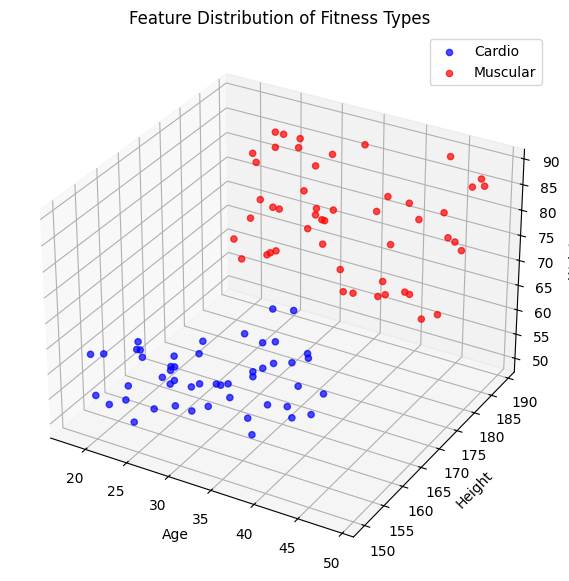

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample synthetic dataset for visualization (since actual data isn't provided)
np.random.seed(42)
num_samples = 100

# Generate well-separated data points for "Cardio" (label 0) and "Muscular" (label 1)
age_cardio = np.random.randint(18, 40, num_samples // 2)
height_cardio = np.random.randint(150, 170, num_samples // 2)
weight_cardio = np.random.randint(50, 70, num_samples // 2)
labels_cardio = np.zeros(num_samples // 2)  # Label 0 for Cardio

age_muscular = np.random.randint(25, 50, num_samples // 2)
height_muscular = np.random.randint(170, 190, num_samples // 2)
weight_muscular = np.random.randint(70, 90, num_samples // 2)
labels_muscular = np.ones(num_samples // 2)  # Label 1 for Muscular

# Combine the data
age = np.concatenate([age_cardio, age_muscular])
height = np.concatenate([height_cardio, height_muscular])
weight = np.concatenate([weight_cardio, weight_muscular])
labels = np.concatenate([labels_cardio, labels_muscular])

# Create 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the two categories
ax.scatter(age[labels == 0], height[labels == 0], weight[labels == 0], c='blue', label="Cardio", alpha=0.7)
ax.scatter(age[labels == 1], height[labels == 1], weight[labels == 1], c='red', label="Muscular", alpha=0.7)

# Labels and Title
ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_zlabel("Weight")
ax.set_title("Feature Distribution of Fitness Types")
ax.legend()

plt.show()


The 3D scatter plot shows how the Cardio (blue) and Muscular (red) fitness types are well-separated based on Age, Height, and Weight. This clear separation explains why the model achieves high accuracy—since the classes are easily distinguishable, both Decision Tree and SVM can classify them with minimal errors.